In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import json

In [3]:
%run GetLossObj.ipynb

In [4]:
baseDir = "../save/server1/rnn/model23/"
# expData = torch.load(baseDir+"experimentData.pth")
plotTrainReconLosses = torch.load(baseDir + "plot_train_recon_losses", map_location="cpu")
plotValReconLosses = torch.load(baseDir + "plot_val_recon_losses", map_location="cpu")
with open(baseDir + "args.txt") as f:
    args = f.read()

In [5]:
args

'{"h_dim": 256, "z_dim": 0, "no_cuda": false, "no_attn": true, "n_epochs": 200, "batch_size": 64, "n_layers": 2, "initial_lr": 0.0001, "lr_decay_every": 10, "lr_decay_factor": 0.1, "lr_decay_beginning": 20, "print_every": 1, "criterion": "L1Loss", "save_freq": 10, "down_sample": 0.0, "model": "rnn", "lambda_l1": 0, "lambda_l2": 0.0005, "no_schedule_sampling": false, "scheduling_start": 1.0, "scheduling_end": 0.0, "tries": 12, "kld_warmup_until": 5, "kld_weight_max": 0.1, "no_shuffle_after_epoch": false, "clip": 10, "dataset": "traffic", "predictOnTest": true, "encoder_input_dropout": 0.5, "encoder_layer_dropout": 0.5, "decoder_input_dropout": 0.5, "decoder_layer_dropout": 0.5, "noEarlyStopping": false, "earlyStoppingPatients": 3, "earlyStoppingMinDelta": 0.0001, "bidirectionalEncoder": true, "local": false, "cuda": true, "_device": "cuda", "use_attn": false, "use_schedule_sampling": true, "x_dim": 207, "sequence_len": 12, "channels": 2, "save_dir": "../save/models/model23/"}'

In [6]:
args = Bunch(json.loads(args))
args.cuda = False

In [7]:
dataDict = getDataLoaders("../data/traffic/trafficWithTime/")

INFO:root:Getting loaders
INFO:root:Getting train loader
INFO:root:Getting val loader
INFO:root:Getting test loader


In [8]:
getlossobj = PostProcess(baseDir, dataDict=dataDict, chooseModel="rnn")

In [22]:
print("min val loss: {:.4f} at idx {}".format(np.min(plotValReconLosses), np.argmin(plotValReconLosses)))

min val loss: 4.7256 at idx 52


In [23]:
plotValReconLosses[48:54]

[4.766678146033917,
 5.069510001337753,
 4.809154889212464,
 4.7754563956328155,
 4.725637012776339,
 4.9462350067102685]

In [26]:
valRetVals = getlossobj.getLossAtEpoch("rnn_state_dict_50.pth", "val")

In [27]:
trainRetVals = getlossobj.getLossAtEpoch("rnn_state_dict_50.pth", "train")

In [24]:
testRetVals = getlossobj.getLossAtEpoch("rnn_state_dict_50.pth", "test")

In [28]:
print("train: {:.4f}, val: {:.4f}, test: {:.4f}".format(trainRetVals["L1Loss"],valRetVals["L1Loss"], testRetVals["L1Loss"]))

train: 3.6788, val: 4.8091, test: 5.9371


In [16]:
def plotRandomInstance(preds,targets, datas, dataset):
    instance = np.random.randint(datas.shape[0])
    sensor = np.random.randint(datas.shape[2])
    p = preds[instance, :, sensor]
    t = targets[instance, :, sensor]
    d = datas[instance, :, sensor]
    plt.plot(range(5,65, 5),p, label="Pred")
    #plt.fill_between(range(0,60, 5),m-1.96*std, m+1.96*std)
    plt.plot(range(5,65, 5),t, label="target")
    plt.plot(range(-55,5, 5), d, label="input")
    plt.legend()
    plt.xlabel("Minutes relative to prediction time")
    plt.ylabel("Speed (mph)")
    plt.title("random sensor sample {}".format(dataset))
    plt.show()

In [17]:
plotRandomInstance(trainRetVals["preds"], trainRetVals["targets"], trainRetVals["datas"], "Train")

NameError: name 'trainRetVals' is not defined

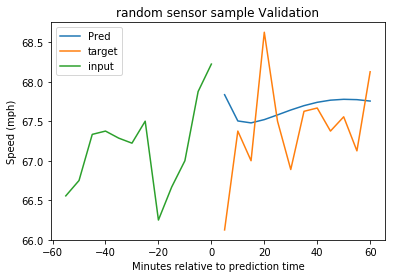

In [23]:
plotRandomInstance(valRetVals["preds"], valRetVals["targets"], valRetVals["datas"], "Validation")

In [ ]:
plotRandomInstance(testRetVals["preds"], testRetVals["targets"], testRetVals["datas"], "Test")

In [ ]:
total = 0
for p in getlossObj.model.parameters():
    total += np.prod(p.shape)
print(total)

In [ ]:
print(getlossObj.dataDict["train_mean"], getlossObj.dataDict["val_mean"], getlossObj.dataDict["train_std"], getlossObj.dataDict["val_std"])

In [ ]:
plt.plot(np.sqrt(np.mean((predsVal - targetsVal)**2, axis=(1,2))))
ticks = plt.xticks(np.arange(0,12), np.arange(5,13*5, 5))
plt.xlabel("Minutes after prediction time")
plt.ylabel("RMSE")


In [ ]:
plotTrainValCurve(plotTrainReconLosses, plotValReconLosses)

In [ ]:
next(iter(getlossobj.model.parameters())).is_cuda

In [26]:
for name, p in getlossobj.model.named_parameters():
    if bias in 
    print(name)

enc.embedding.weight
enc.embedding.bias
enc.gru.weight_ih_l0
enc.gru.weight_hh_l0
enc.gru.bias_ih_l0
enc.gru.bias_hh_l0
enc.gru.weight_ih_l0_reverse
enc.gru.weight_hh_l0_reverse
enc.gru.bias_ih_l0_reverse
enc.gru.bias_hh_l0_reverse
enc.gru.weight_ih_l1
enc.gru.weight_hh_l1
enc.gru.bias_ih_l1
enc.gru.bias_hh_l1
enc.gru.weight_ih_l1_reverse
enc.gru.weight_hh_l1_reverse
enc.gru.bias_ih_l1_reverse
enc.gru.bias_hh_l1_reverse
dec.embedding.weight
dec.embedding.bias
dec.gru.weight_ih_l0
dec.gru.weight_hh_l0
dec.gru.bias_ih_l0
dec.gru.bias_hh_l0
dec.gru.weight_ih_l1
dec.gru.weight_hh_l1
dec.gru.bias_ih_l1
dec.gru.bias_hh_l1
dec.out.weight
dec.out.bias
